<a href="https://colab.research.google.com/github/Veelsuv/Data-Science/blob/master/KemenkeuHackathon/2021/Basic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Basic Regression </br> <i>(Linier Regression)</i>


---



<h4>Re-learning by Leonard Simorangkir</h4>

<b>Pemateri:</b>
- Achmad Rasis Mardhi
- Teguh Prasetyo

**Ministry of Finance - Data Analytics Community**

## Aplikasi Soal

(1) Regresi Linier Sederhana <br>
Sebagai contoh soal yaitu ingin dianalisis pengeluaran rumah tangga ($) yang terdiri dari makanan jadi, minuman, dan rokok sebagai variabel dependen (y) yang diasumsikan dipengaruhi oleh pengeluaran dari pos lain yang terdiri dari pendidikan, rekreasi, dan olahraga sebagai variabel independen (x). Karena variabel independen hanya satu variabel, maka digunakan analisis regresi linier sederhana. <br>
<br>
(2) Regresi Linier Berganda <br>
Sebagai contoh soal yaitu ingin dianalisis pengaruh karakteristik rumah yang dijual (variabel sqft_living, grade, sqft_above, sqft_living15) sebagai variabel independen (x) terhadap harga jual (variabel price) sebagai variabel dependen (y). Karena variabel independen (x) mempunyai lebih dari satu variabel, maka digunakan analisis regresi linier berganda. <br>

In [ ]:
# from google.colab import files
# drive.mount('content/drive')
# # https://drive.google.com/file/d/1GDvVGaxAiyjcj2Vl7pUKTnPmy_8MFOOJ/view?usp=sharing


## Praktek 

In [3]:
#core package for data science
import numpy as np
import pandas as pd

#import package for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#hide warnings so you can't find any warning
import warnings 
warnings.simplefilter('ignore')

print("Done !!!")

Done !!!


## (1) Simple Linear Regression (Ordinary Least Square/ OLS)

### (1.1) Load Data

Inputkan data datareglin1.csv

In [4]:
data = pd.read_csv("/content/drive/MyDrive/datareglin1.csv", sep = ';')
data.sample(5)

,Tahun dan Bulan,"pendidikan, rekreasi dan olahraga","makanan jadi, minuman, rokok dan tembakau"
4,Sep-06,136.86,147.41
21,Feb-08,153.24,160.82
13,Jun-07,144.27,148.24
20,Jan-08,151.90,160.75
1,Jun-06,135.78,137.20


Melihat info data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tahun dan Bulan                            25 non-null     object 
 1   pendidikan, rekreasi dan olahraga          25 non-null     float64
 2   makanan jadi, minuman, rokok dan tembakau  25 non-null     float64
dtypes: float64(2), object(1)
memory usage: 728.0+ bytes


Dari output diatas jumlah data yaitu 25 baris dan tidak ada data yang kosong. karena banyaknya data pada variabel pendidikan, rekreasi dan olahraga; variabel makanan jadi, minuman, rokok dan tembakau sebanyak 25 baris.

###(1.2) Exploratory Data Analysis

Pertama kita bisa melihat korelasi pada satu variabel dengan variabel lain sebagai berikut:

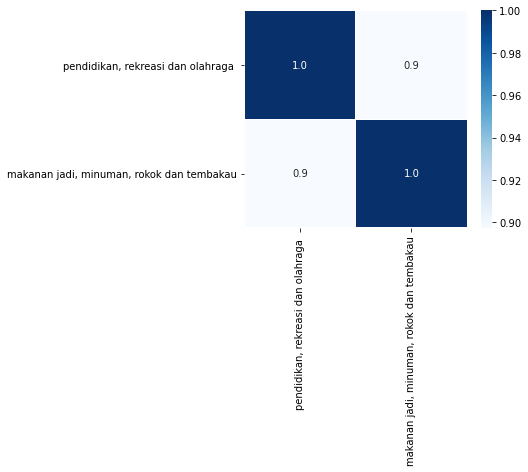

In [6]:
plt.figure(figsize=(5,4)) #Mengubah ukuran plot data, kamu bisa mengubah angka dengan nilai berapa saja
sns.heatmap(data.corr(), #data apa yang ingin dibuat plot, kasus ini akan membuat plot nilai korelasi
            annot=True, #jika ingin mendapatkan nilai 
            linewidths=.10, #panjang garis jarak kotak satu ke lainnya
            fmt = '.1f', #banyaknya angka dibelakang koma
            cmap='Blues'); #warna maps

Korelasi yang didapatkan antara variabel pengeluaran untuk pendidikan, rekreasi, dan olahraga dengan makanan jadi, minuman, dan rokok sebesar 0.90 yang artinya semakin besar pengeluaran untuk pendidikan, rekreasi, dan olahraga  maka akan semakin besar juga pengeluaran untuk makanan jadi, minuman, dan rokok.

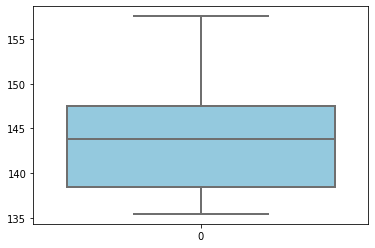

In [7]:
sns.boxplot(data=data['pendidikan, rekreasi dan olahraga '], linewidth=2, color="skyblue")

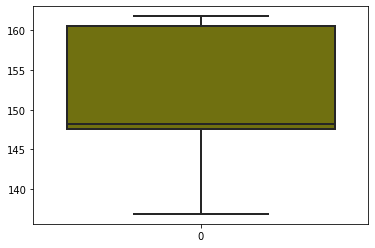

In [8]:
sns.boxplot(data=data['makanan jadi, minuman, rokok dan tembakau'], linewidth=2, color="olive")

Panggil package yang akan digunakan sebagai berikut:

In [9]:
#import package untuk regresi linier
from sklearn.linear_model import LinearRegression 

#panggil package yang dibutuhkan untuk membagi training dan testing
from sklearn.model_selection import train_test_split

Mendefinisikan variabel independen (x) yaitu pendidikan, rekreasi dan olahraga dan dependen (y) yaitu makanan jadi, minuman, rokok dan tembakau.

In [10]:
X = data [['pendidikan, rekreasi dan olahraga ']]
y = data [['makanan jadi, minuman, rokok dan tembakau']]

Memisahkan data training dan data training 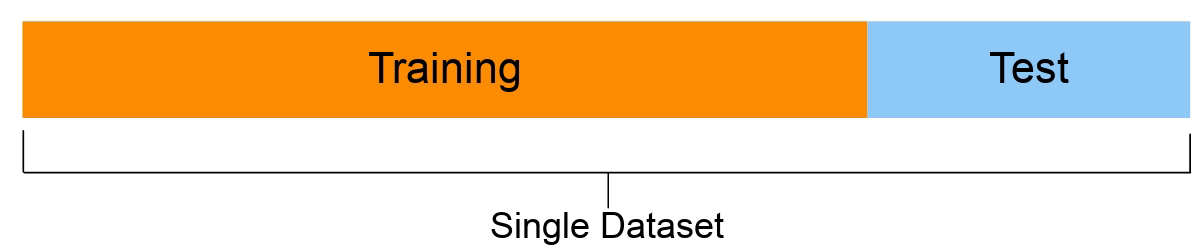

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

Melihat banyaknya baris kolom dan baris pada data training dan testing pada variabel X 

In [12]:
print ("Training data :", X_train.shape)
print ("Testing data :", X_test.shape)

Training data : (20, 1)
Testing data : (5, 1)


In [13]:
X_train.sample()

,"pendidikan, rekreasi dan olahraga"
3,136.68


### (1.3) Model Building

Fitting data merupakan proses pemasangan model ke data yang ada dengan cara sebagai berikut

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train, y_train)

LinearRegression()

### (1.4) Model Interpretation

In [16]:
print('Nilai Koefisien X :',lm.coef_)
print('Nilai Koefisien intercept :',lm.intercept_)

Nilai Koefisien X : [[1.0449287]]
Nilai Koefisien intercept : [0.07299953]


Dari output diatas didapat model regresi linier sederhana sebagai berikut

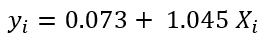

dengan: <br>
$y ̂_i$ = pengeluaran untuk makanan jadi, minuman, dan rokok ke-i <br>
$x_i$ = pengeluaran untuk pendidikan, rekreasi, dan olahraga unit ke-i


Berdasarkan model di atas dapat diinterpretasikan bahwa jika pengeluaran untuk pendidikan, rekreasi, dan olahraga mendekati nol, maka pengeluaran untuk makanan jadi, minuman, dan rokok akan mendekati 0.073. Sedangkan jika pengeluaran untuk pendidikan, rekreasi ,dan olahraga mengalami peningkatan sebesar satu dolar, maka pengeluaran makanan jadi, minuman, dan rokok  akan mengalami peningkatan sebesar 1.045 dolar.

### (1.5) Model Evaluation

Mencari nilai akurasi dengan menggunakan nilai $R^2$ $(R-Square)$ dan $MSE$ $(Mean$ $Square$ $Error)$ untuk data training.

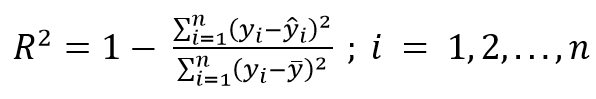$R^2$ $(R-Square)$ dijadikan sebagai ukuran seberapa baik hasil estimasi kurva regresi mendekati data aslinya sehingga semakin besar nilai R-square maka semakin baik pula model tersebut. Nilai R-square pada umumnya terletak di antara nol dan satu.

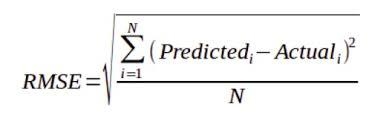 $RMSE$ $(Root Mean$ $Square$ $Error)$ salah satu pengukuran kesalahan yang banyak digunakan. Nilai RMSE dihitung dengan mengkuadratkan selisih antara nilai prediksi dengan nilai sebenarnya kemudian diakar kuadrat untuk memperkecil skala. Semakin kecil nilai RMSE maka semakin tinggi tingkat keakuratan nilai suatu prediksi.

In [17]:
# import package untuk mencari RMSE
from sklearn.metrics import mean_squared_error

In [18]:
#mencari nilai R-Square pada data training
print("R-squared data training adalah :",lm.score(X_train, y_train))

R-squared data training adalah : 0.8406655421780955


In [19]:
#mencari nilai prediksi dari data y
y_prediction = lm.predict(X_train)

In [20]:
# mencari nilai MSE 
print("RMSE untuk data training adalah:", mean_squared_error(y_train, y_prediction, squared=False))

RMSE untuk data training adalah: 3.1886793567437355


nilai R-square untuk data training sebesar 0.8407 menjelaskan bahwa terdapat 84.07% proporsi pengeluaran untuk pendidikan, rekreasi, dan olahraga (X) mempengaruhi makanan jadi, minuman, dan rokok (y). 
RMSE yang didapatkan yaitu sebesar 3.188.

### (1.6) Prediction

In [21]:
#mencari nilai prediksi dari data y
y_prediction = lm.predict(X_test)

In [22]:
#mencari R-square data training
print("R-Square untuk data testing adalah :", lm.score(X_test, y_test))

R-Square untuk data testing adalah : 0.38524930581392147


In [23]:
#mencari nilai MSE data training
print("RMSE untuk data testing adalah:",mean_squared_error(y_test, y_prediction, squared=False))

RMSE untuk data testing adalah: 4.673360364063995


nilai R-square untuk data testing sebesar 0.3852 menjelaskan bahwa terdapat 38.52% proporsi pengeluaran untuk pendidikan, rekreasi, dan olahraga (X) mempengaruhi makanan jadi, minuman, dan rokok (y). 
MSE yang didapatkan yaitu sebesar 4.673.

In [24]:
# menampilkan nilai prediksi
y_prediction

array([[152.83112671],
       [158.79766961],
       [150.8248636 ],
       [149.05893409],
       [153.60437395]])

Pada output di atas merupakan hasil prediksi nilai dependen (y) data testing dari nilai independen dengan menggunakan model regresi yang terbentuk. Data pertama dari data testing diprediksikan senilai 152.831, data kedua 158.797 dan seterusnya dapat dilihat pada output diatas.

Kemudian kita dapat melihat scatter plot pola hubungan data pengeluaran untuk pendidikan, rekreasi, dan olahraga terhadap pengeluaran untuk makanan jadi, minuman, dan rokok

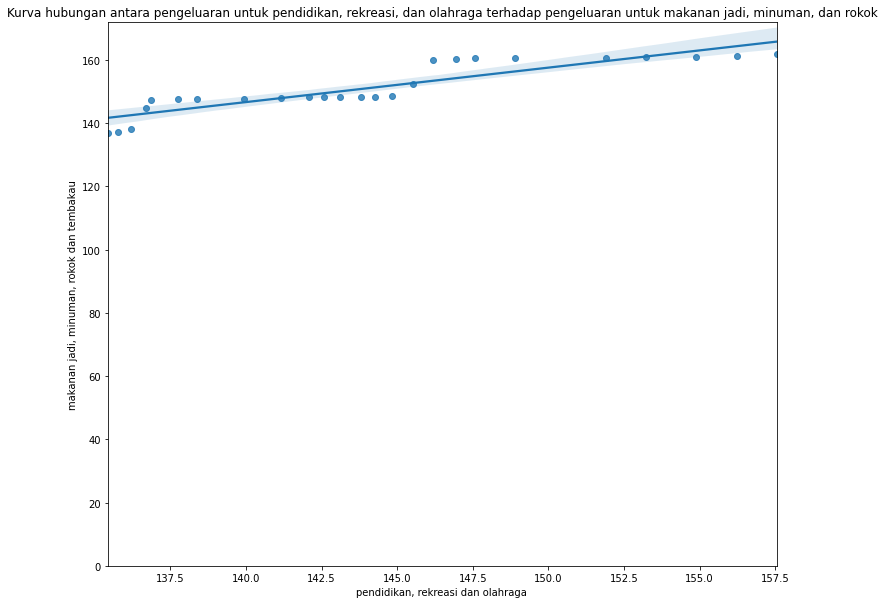

In [25]:
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.regplot(x="pendidikan, rekreasi dan olahraga ", y = "makanan jadi, minuman, rokok dan tembakau", data=data)
plt.ylim(0,);
plt.title("Kurva hubungan antara pengeluaran untuk pendidikan, rekreasi, dan olahraga terhadap pengeluaran untuk makanan jadi, minuman, dan rokok");

Dapat dilihat dari plot diatas semakin tinggi pengeluaran untuk pendidikan, rekreasi, dan olahraga maka semakin tinggi pula pengeluaran untuk makanan jadi, minuman, dan rokok, dengan visualisasi garis regresi yang searah/naik.

## (2) Multiple Linear Regression (Ordinary Least Square/ OLS)

### (2.1) Load Data

In [26]:
data2 = pd.read_csv("/content/drive/MyDrive/kc_house_data.csv")
data2.sample(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15310,9285800020,20140827T000000,622500.0,3,2.50,2260,4550,1.5,0,0,4,7,1380,880,1928,0,98126,47.5714,-122.376,1870,4582
13013,5550300175,20141206T000000,285000.0,2,1.00,720,6400,1.0,0,0,4,6,720,0,1943,0,98126,47.5286,-122.368,1030,6400
12055,8563050350,20150306T000000,655000.0,4,2.25,2420,7725,1.0,0,0,4,8,1890,530,1972,0,98052,47.6287,-122.093,1740,7944
17460,7335400020,20140626T000000,219500.0,3,1.00,1090,6710,1.5,0,0,5,5,1090,0,1912,0,98002,47.3066,-122.217,1170,6708
5178,6447300345,20150406T000000,1160000.0,4,3.00,2680,15438,2.0,0,2,3,8,2680,0,1902,1956,98039,47.6109,-122.226,4480,14406
3438,7000100711,20140621T000000,1100000.0,3,2.50,2200,20000,1.0,0,1,3,7,1400,800,1952,0,98004,47.5809,-122.191,3050,11775


Melihat info data

In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Data informasi tersebut semua data mempunyai jumlah sebanyak 21.613 data, dengan tidak ada variabel yang memiliki Missing Value, sehingga tidak perlu dilakukan penanganan Missing Value

##Data Dictionaries :

Informasi Variabel: <br>
**id** :
a notation for a house

**date** :
Date house was sold

**price** :
Price is prediction target

**bedrooms** :
Number of Bedrooms/House

**bathrooms** :
Number of bathrooms/House

**sqft_living** :
square footage of the home

**sqft_lot** :
square footage of the lot

**floors** :
Total floors (levels) in house

**waterfront** :
House which has a view to a waterfront

**view** :
Has been viewed

**condition** :
How good the condition is ( Overall )

**grade** :
overall grade given to the housing unit, based on King County grading system

**sqft_above** :
square footage of house apart from basement

**sqft_basement** :
square footage of the basement

**yr_built** :
Built Year

**yr_renovated** :
Year when house was renovated

**zipcode** :
zip

**lat** :
Latitude coordinate

**long** :
Longitude coordinate

**sqft_living15** :
Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15** :
lotSize area in 2015(implies-- some renovations)

### (2.2) Exploratory Data Analysis

In [28]:
# mengubah type data date menjadi datetime
data2['date'] = pd.to_datetime(data2['date'])

# mengambil data bulan dari kolom date
data2['Month'] = data2['date'].apply(lambda date: date.month)

# mengambil data tahun dari kolom date
data2['year'] = data2['date'].apply(lambda date: date.year)

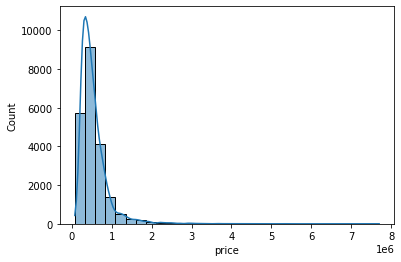

In [27]:
sns.histplot(data2['price'], kde=True, bins=30)

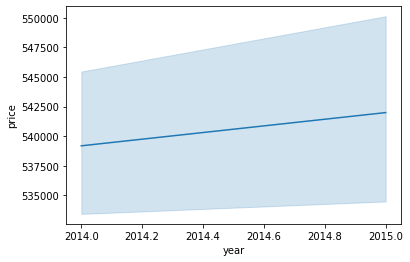

In [29]:
sns.lineplot(x='year', y='price', data=data2)

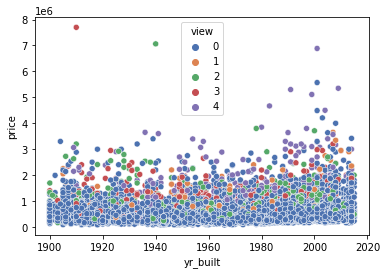

In [30]:
sns.scatterplot(x='yr_built', y='price', data=data2, hue='view', palette='deep')

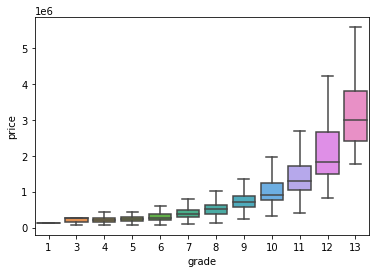

In [31]:
sns.boxplot(x='grade', y='price', data=data2, showfliers=False)

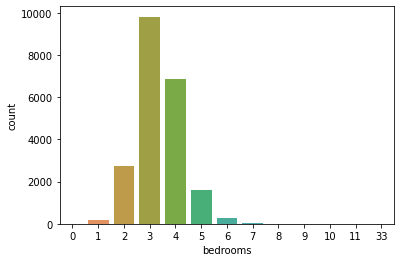

In [32]:
sns.countplot(x='bedrooms', data=data2)

In [33]:
data2['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Melihat korelasi antara variabel satu dengan lainnya.

In [34]:
data2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,year
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.011708,0.010128
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.010081,0.003576
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.001533,-0.009838
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.007392,-0.026596
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.011810,-0.029038
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.002369,0.005468
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.014005,-0.022315
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.008132,-0.004165
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,-0.005638,0.001364
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.021978,-0.045589


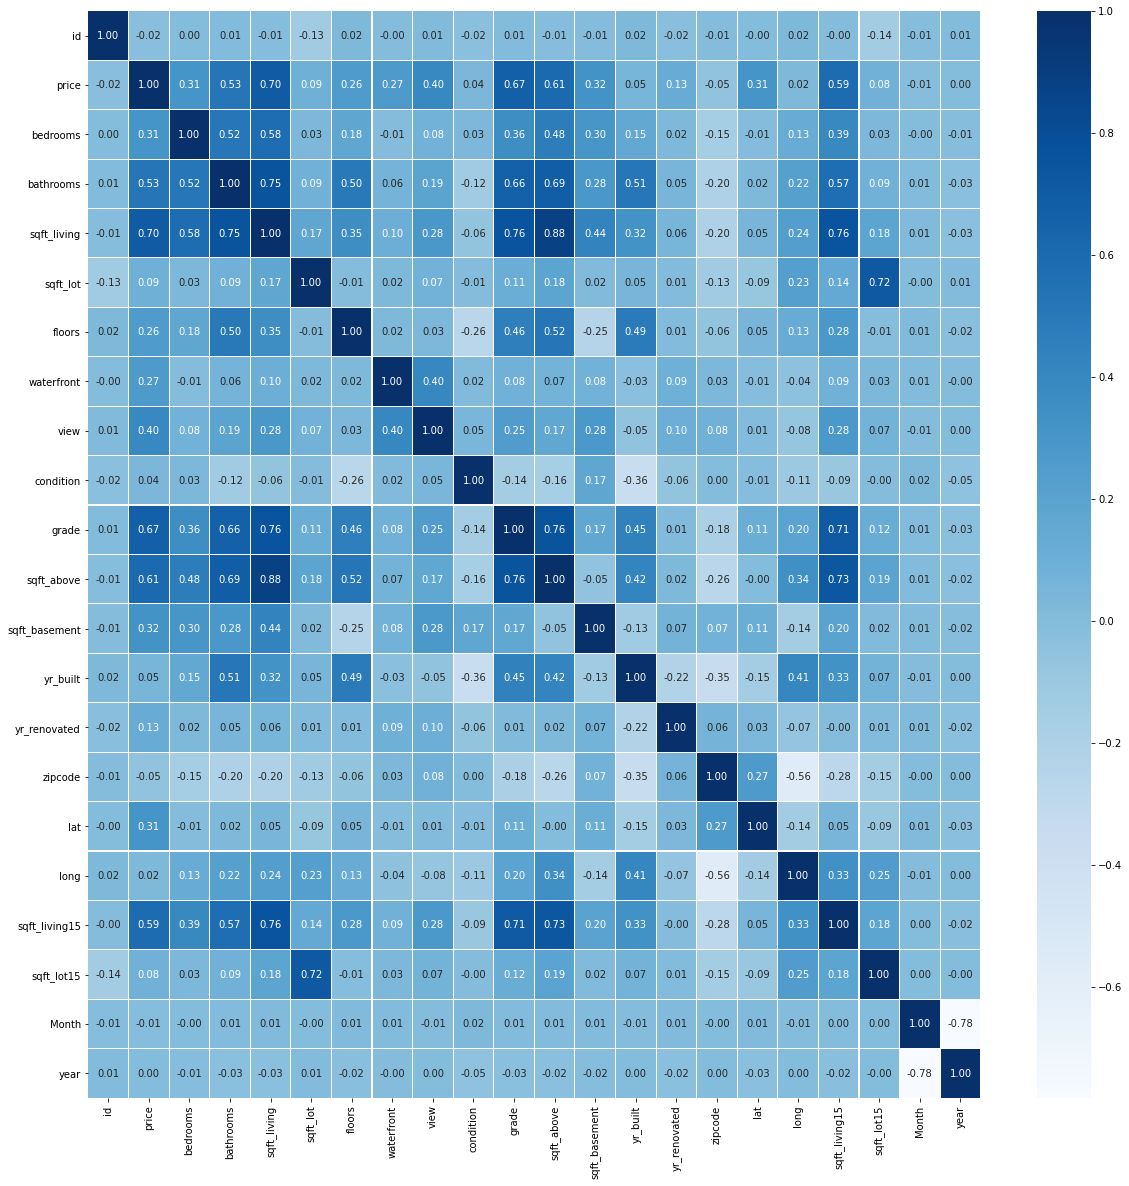

In [35]:
plt.figure(figsize=(20,20)) #Mengubah ukuran plot data, kamu bisa mengubah angka dengan nilai berapa saja
sns.heatmap(data2.corr(), #data apa yang ingin dibuat plot, kasus ini akan membuat plot nilai korelasi
            annot=True, #jika ingin mendapatkan nilai 
            linewidths=.10, #panjang garis jarak kotak satu ke lainnya
            fmt = '.2f', #banyaknya angka dibelakang koma
            cmap='Blues'); #warna maps

In [36]:
korelasi = data2.corr() >= 0.65

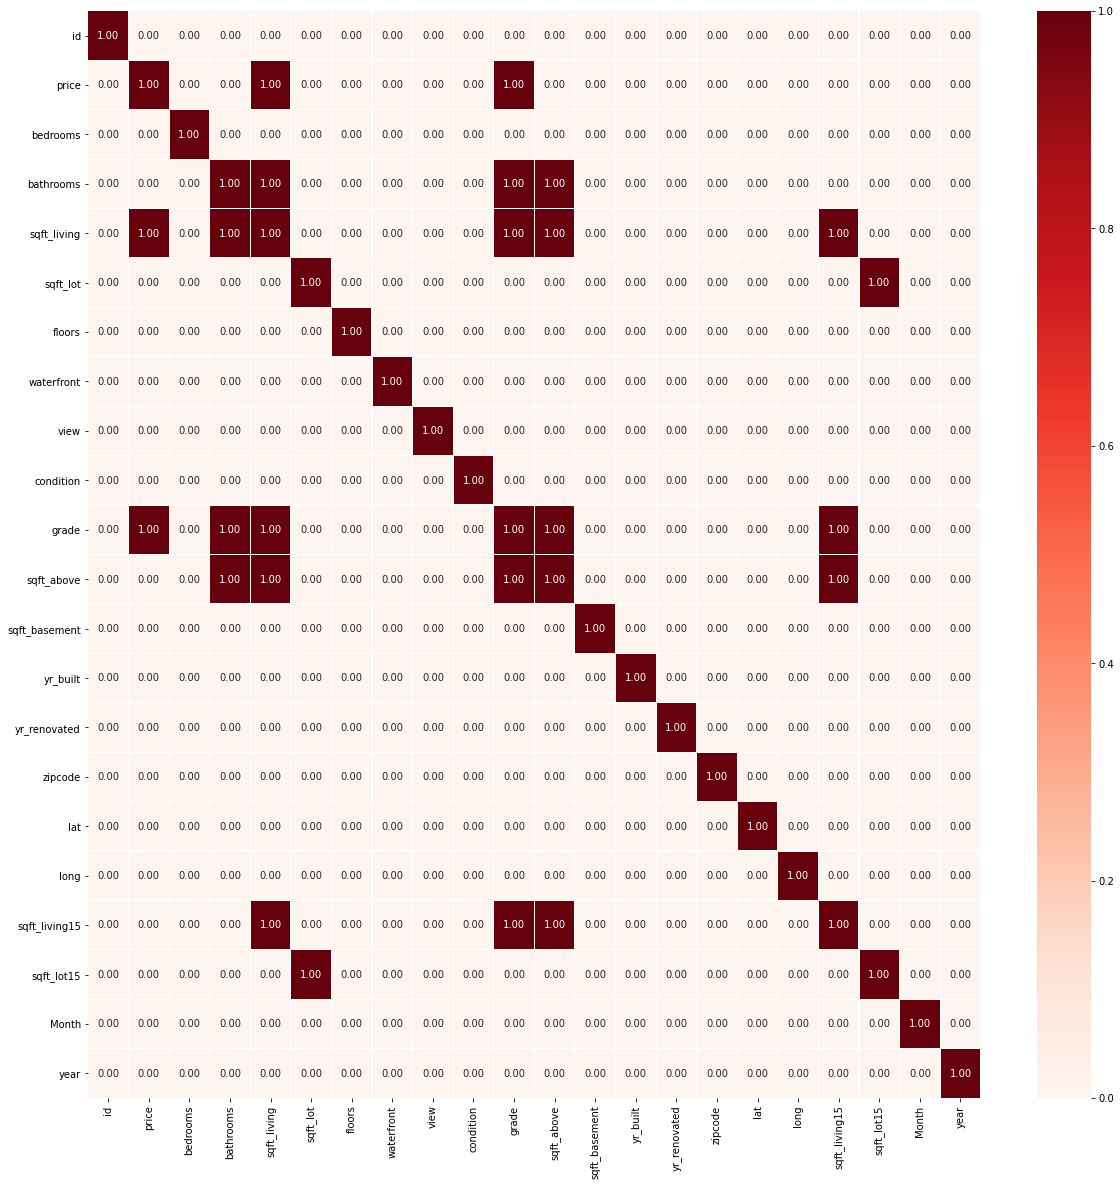

In [37]:
plt.figure(figsize=(20,20)) #Mengubah ukuran plot data, kamu bisa mengubah angka dengan nilai berapa saja
sns.heatmap(korelasi, #data apa yang ingin dibuat plot, kasus ini akan membuat plot nilai korelasi
            annot=True, #jika ingin mendapatkan nilai 
            linewidths=.10, #panjang garis jarak kotak satu ke lainnya
            fmt = '.2f', #banyaknya angka dibelakang koma
            cmap='Reds'); #warna maps

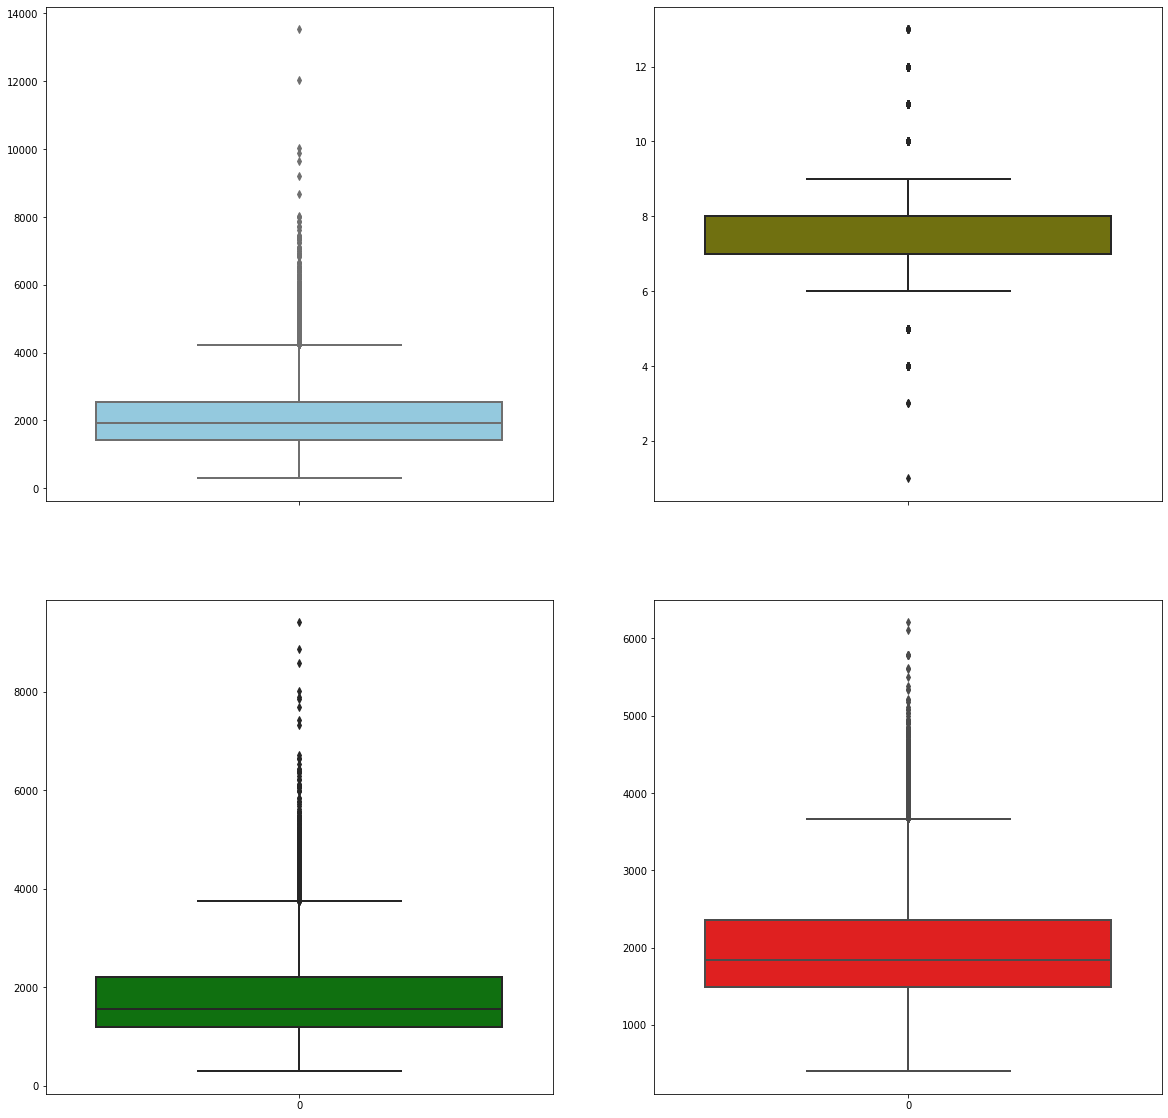

In [38]:
f, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True)
sns.boxplot(data=data2['sqft_living'], linewidth=2, color="skyblue", ax=axes[0, 0])
sns.boxplot(data=data2['grade'], linewidth=2, color="olive", ax=axes[0, 1])
sns.boxplot(data=data2['sqft_above'], linewidth=2, color="green", ax=axes[1, 0])
sns.boxplot(data=data2['sqft_living15'], linewidth=2, color="red", ax=axes[1, 1])

### (2.3) Data Preprocessing

Dalam contoh kasus ini, metode data preprocessing yang digunakan adalah mendeteksi keberadaan outlier dan melakukan penghapusan atas kolom data yang terdeteksi sebagai outlier. Untuk contoh lain, outlier handling dapat dilakukan dengan beberapa cara antara lain: do nothing (apabila outlier memang mencerminkan kondisi di lapangan), delete (apabila outlier kemungkinan besar dari kesalahan manusia), atau Imputation (dengan replace nilai berdasarkan metode tertentu, misal dengan nilai mean atau median) 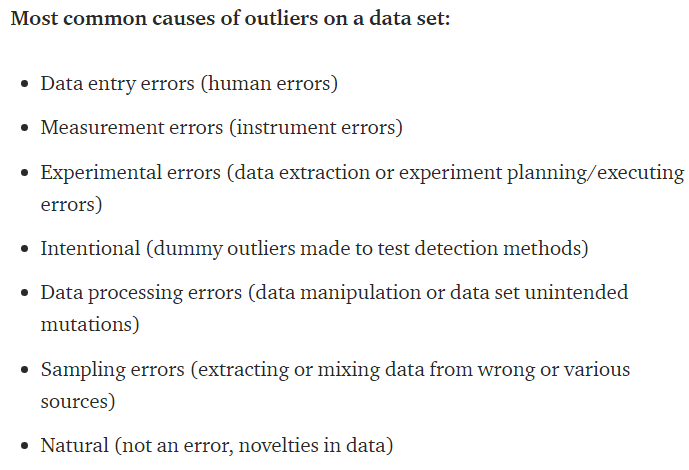

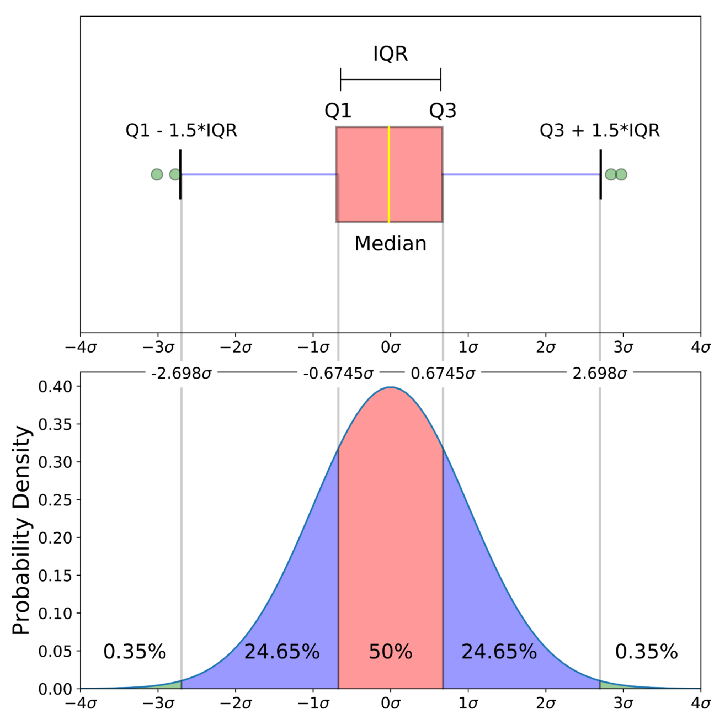

In [39]:
data2.drop('date',inplace=True, axis=1)

In [40]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [41]:
Q1 = data2.quantile(0.05)
Q3 = data2.quantile(0.95)

IQR = Q3 - Q1
print(IQR)

id               8.784820e+09
price            9.464800e+05
bedrooms         3.000000e+00
bathrooms        2.500000e+00
sqft_living      2.820000e+03
sqft_lot         4.153920e+04
floors           1.000000e+00
waterfront       0.000000e+00
view             2.000000e+00
condition        2.000000e+00
grade            4.000000e+00
sqft_above       2.550000e+03
sqft_basement    1.190000e+03
yr_built         9.600000e+01
yr_renovated     0.000000e+00
zipcode          1.730000e+02
lat              4.393400e-01
long             4.080000e-01
sqft_living15    2.160000e+03
sqft_lot15       3.506360e+04
Month            1.000000e+01
year             1.000000e+00
dtype: float64


In [42]:
data_nooutlier = data2.copy()
data_nooutlier = data_nooutlier[~((data_nooutlier < (Q1 - 1.5 * IQR)) | (data_nooutlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_nooutlier.shape

(19998, 22)

In [43]:
data_nooutlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19998 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19998 non-null  int64  
 1   price          19998 non-null  float64
 2   bedrooms       19998 non-null  int64  
 3   bathrooms      19998 non-null  float64
 4   sqft_living    19998 non-null  int64  
 5   sqft_lot       19998 non-null  int64  
 6   floors         19998 non-null  float64
 7   waterfront     19998 non-null  int64  
 8   view           19998 non-null  int64  
 9   condition      19998 non-null  int64  
 10  grade          19998 non-null  int64  
 11  sqft_above     19998 non-null  int64  
 12  sqft_basement  19998 non-null  int64  
 13  yr_built       19998 non-null  int64  
 14  yr_renovated   19998 non-null  int64  
 15  zipcode        19998 non-null  int64  
 16  lat            19998 non-null  float64
 17  long           19998 non-null  float64
 18  sqft_l

In [44]:
data_nooutlier['grade'].value_counts().sort_index(ascending=True)

1        1
3        3
4       27
5      217
6     1893
7     8473
8     5668
9     2357
10     990
11     314
12      51
13       4
Name: grade, dtype: int64

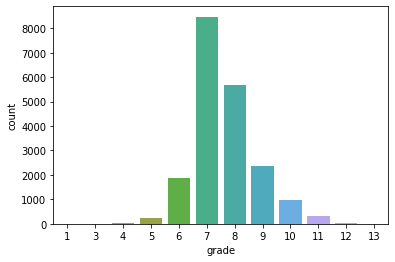

In [45]:
sns.countplot('grade',data=data_nooutlier)

Memisahkan atau memilih data untuk variabel independen (X) dan variabel dependen (y)

In [103]:
# feature selection
# memisahkan data X dan y
X = data_nooutlier[['sqft_living','grade','sqft_above','sqft_living15']]
y = data_nooutlier['price'] 

Memisahkan dataset dengan sklearn

In [104]:
#pisahkan dataset dengan sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)

Memisahkan data training dan data training 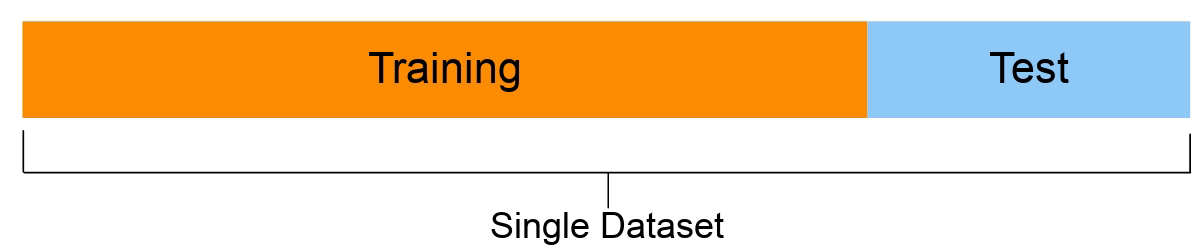

In [105]:
# memisahkan data training dan testing
print("Training data", X_train.shape)
print("Testing data", X_test.shape)

Training data (15998, 4)
Testing data (4000, 4)


Dari output diatas didapatkan bahwa data training sebanyak 15.998 data sedangkan data testing sebanyak 4.000 data. 

### (2.4) Model Building

In [106]:
lm = LinearRegression()

In [108]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### (2.5) Model Interpretation

In [109]:
print ("Nilai koefisien X:", lm.coef_)
print ("Nilai koefisien intersep:", lm.intercept_)

Nilai koefisien X: [ 1.67030501e+02  1.01064736e+05 -7.17400894e+01  4.61154648e+01]
Nilai koefisien intersep: -561323.6443921335


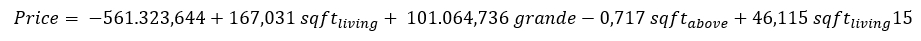

Dari model yang terbentuk dapat diinterpretasikan sebagai berikut:
1.   Ketika semua variabel independen mendekati nol maka menurunkan nilai price mendekati -561.323,644. 
2.   Ketika sqft_living naik satu satuan maka akan menaikkan nilai price 167,031. 
3.   Ketika grade naik satu satuan maka price akan menaikkan price 101.064,736. 
4.   Ketika nilai sqrt_above naik satu satuan maka akan menurunkan nilai price sebesar 0,717.
5.   Kerika nilai sqrt_living15 naik satu satuan akan menaikkan price sebesar 46,115.







### (2.6) Model Evaluation

In [110]:
print("R-square untuk data training adalah", lm.score(X_train, y_train))

R-square untuk data training adalah 0.5404138778111673


In [111]:
y_prediction = lm.predict(X_train)
print("RMSE untuk data training :", mean_squared_error(y_train, y_prediction, squared=False))

RMSE untuk data training : 201770.1151221118


nilai R-square sebesar 0.54041 menjelaskan bahwa sebesar 54.041% proporsi pengaruh price(y) mempengaruhi sqft_living, grade, sqft_above, sqft_living15(X). Sedangkan nilai RMSE pada data training sebesar 201.770,115

In [112]:
y_prediction = lm.predict(X_test)
print("R-square dari data testing:", lm.score(X_test, y_test))
print("RMSE untuk data testing :", mean_squared_error(y_test, y_prediction, squared=False))

R-square dari data testing: 0.5396095584434939
RMSE untuk data testing : 196782.0225381453


nilai R-square sebesar 0.53960 menjelaskan bahwa sebesar 53.960% proporsi pengaruh sqft_living, grade, sqft_above, sqft_living15(X) mempengaruhi price(y). Sedangkan nilai RMSE pada data testing sebesar 196.782,023

### (2.7) Cross Validation

Cross Validation adalah salah satu metode untuk menguji apakah nilai akurasi dan error dari model yang terbentuk, stabil apabila data training dan testing dilakukan pengacakan (random).
Model yang baik adalah model yang mampu menghasilkan akurasi tinggi dan error kecil dalam kondisi apapun meskipun data dilakukan pengacakan untuk training dan testing model. Sehingga diharapkan untuk kepentingan prediksi dengan menggunakan dataset baru, model mampu menghasilkan nilai prediksi yang bagus (Tidak **Underfitting** maupun **Overfitting**). Salah satu metode Cross Validation yang sering digunakan adalah K-Fold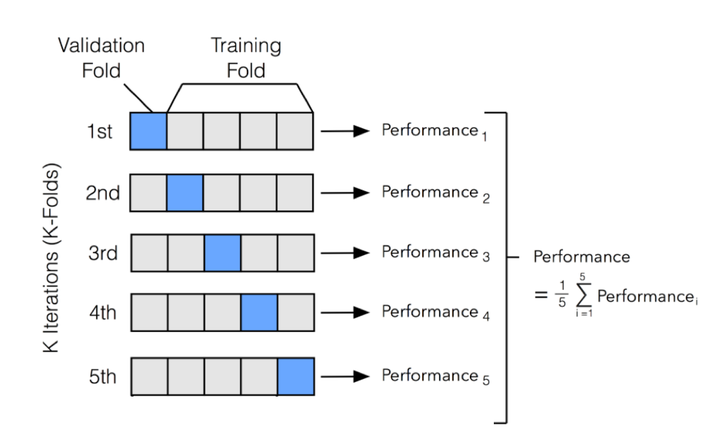

#### (2.7.1) Cross Validation untuk Akurasi (R-sqr)

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X, y, scoring='r2', cv=folds)
scores  

array([0.53162442, 0.54631939, 0.54860753, 0.53701604, 0.53607687])

#### (2.7.2) Cross Validation untuk Error (MSE)

In [114]:
scores = cross_val_score(lm, X, y, scoring='neg_mean_squared_error', cv=5)
scores

array([-4.28330882e+10, -3.96792782e+10, -3.69004957e+10, -4.28987920e+10,
       -4.05438161e+10])

### (2.8) Feature Importance

Model yang baik adalah model yang sederhana namun memiliki akurasi yang tinggi dan error yang rendah. Untuk kasus Multiple Linear Regression, seringkali terdapat banyak variabel X yang digunakan, namun tidak menambah akurasi model. Sehingga perlu dipilih variabel X yang memiliki feature importance terbaik. Berikut adalah salah satu algoritma untuk memilih variabel X yang memiliki feature importance terbaik, yakni menggunakan Recursive Feature Elimination with Cross-Validation (RFECV). 

In [115]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=lm, step=1, scoring='neg_mean_squared_error')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 4


In [116]:
rfecv.ranking_ 

array([1, 1, 1, 1])

In [117]:
pd.DataFrame(rfecv.support_,index=X.columns,columns=['Rank'])

,Rank
sqft_living,True
grade,True
sqft_above,True
sqft_living15,True


In [118]:
np.absolute(rfecv.estimator_.coef_)

array([1.65032964e+02, 1.01614722e+05, 7.21989458e+01, 4.59241222e+01])

Selain menggunakan library feature importance, kita juga dapat mengetahui variabel X yang memiliki pengaruh terbesar terhadap variabel Y dengan melihat koefisien regresinya. Semakin besar nilai koefisien regresi suatu variabel X (abaikan tanda + atau -), semakin besar juga pengaruh variabel X tersebut terhadap variabel Y. Guna penyederhanaan model regresi, kita juga bisa mereduksi dimensi variabel X yang terlalu banyak dengan menggunakan algoritma Principal Component Analysis (PCA) sebelum dilakukan analisis regresi

### (2.9) Prediction & Saving Output

Untuk prediksi data y_test, cukup dengan memanggil dengan fungsi "y_prediction"

In [119]:
y_prediction

array([676721.7906457 , 574333.56317838, 327990.14564015, ...,
       500310.75827166, 228828.98583569, 443392.25716072])

In [120]:
lm.fit(X_train, y_train)
y_hats = lm.predict(X)
data_nooutlier['y_hats'] = y_hats
data_nooutlier.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,year,y_hats
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,320366.912753
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,243872.449977
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,460899.224074
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,490289.967700
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,6,2014,412758.970045
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,1,2015,323227.857501
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,4,2015,450202.229184
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,3,2015,436444.342630
10,1736800520,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,4,2015,810301.433121
11,9212900260,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,5,2014,339521.976712


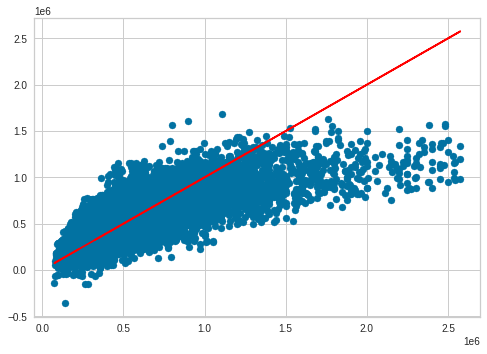

In [121]:
plt.scatter('price','y_hats',data = data_nooutlier)
plt.plot('price','price',data = data_nooutlier,color='red')

Untuk menyimpan/export dataframe ke dalam excel, dapat digunakan fungsi ".to_excel"

In [63]:
data_nooutlier.to_excel("data_output.xlsx")

### (2.10) Save & Load Model

Ada beberapa metode untuk menyimpan model yang nantinya dapat kita gunakan untuk keperluan prediksi maupun deployment. Salah satu yang paling sering digunakan adalah menyimpan dalam format pickle

In [64]:
import pickle

Pkl_Filename = "Pickle_MLR_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lm, file)

In [65]:
with open(Pkl_Filename, 'rb') as file:  
    Pickle_MLR_Model = pickle.load(file)

Pickle_MLR_Model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## (3) Algoritma Lain untuk Regresi Linier 

### (3.1) Library STATSMODELS

Selain menggunakan library sklearn untuk model building regresi linier, kita dapat menggunakan library lain yakni statsmodels. Kelebihan library ini antara lain dapat menghasilkan output model yang lebih lengkap, seperti Uji Simultan dan Uji Parsial untuk mengetahui pengaruh variabel X terhadap variabel Y, serta dapat menghasilkan statistik untuk model evaluation (R-sqr). Namun library ini memiliki kekurangan antara lain kita tidak bisa melakukan splitting untuk data training dan testing secara manual dan beberapa fitur sklearn lainnya karena library ini tidak memiliki fungsi selengkap pada library sklearn 

In [66]:
from statsmodels.formula.api import ols

X = data_nooutlier[['sqft_living','grade','sqft_above','sqft_living15']]
y = data_nooutlier['price'] 

model = ols(formula='y ~ X', data=data_nooutlier)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5874.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        03:23:22   Log-Likelihood:            -2.7255e+05
No. Observations:               19998   AIC:                         5.451e+05
Df Residuals:                   19993   BIC:                         5.452e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.603e+05   1.16e+04    -48.335      0.0

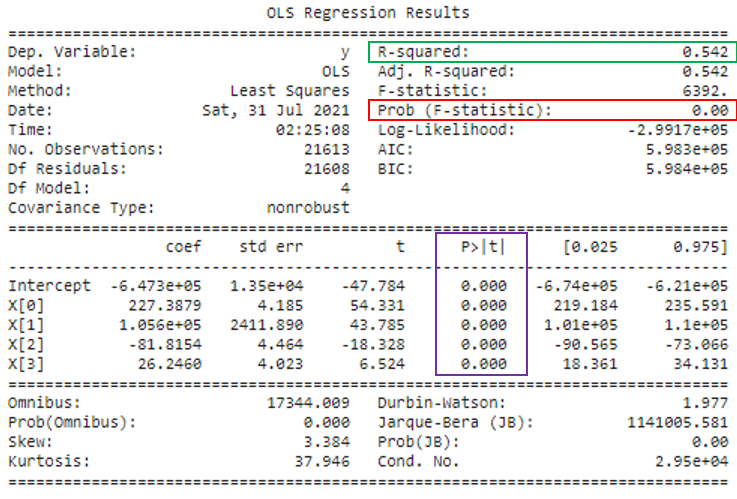







Dari hasil library statsmodels tersebut dapat disimpulkan beberapa hal yakni:

1.   Nilai P-value dari Statistik Uji F adalah 0.00 (merah) < alpha 0,05 -> Secara simultan, semua variabel X (sqft_living','grade','sqft_above','sqft_living15) mempengaruhi signifikan variabel Y (price)
2.   Nilai P-value dari Statistik Uji t adalah 0.00 (ungu) untuk semua variabel X < alpha 0,05 -> Secara parsial, setiap variabel X (sqft_living','grade','sqft_above','sqft_living15) mempengaruhi signifikan variabel Y (price)
3.   Nilai R-sqr (hijau) sebesar 0.542 menjelaskan bahwa sebesar 54.2% proporsi pengaruh variabel X mempengaruhi variabel Y





### (3.2) Model Iterative Selain Ordinary Least Square (OLS)

Selain dengan algoritma OLS yang menggunakan prinsip model linier (meminimalkan error dengan operasi matriks) guna menduga parameter, terdapat pendekatan lain sebagai alternatif yakni algoritma iteratif dengan prinsip metode optimisasi. Tentunya algoritma iteratif memiliki keunggulan dan kelemahan. Keunggulannya antara lain dapat dengan mudah dan cepat dalam proses perhitungan karena memanfaatkan perkembangan komputasi, namun kelemahannya adalah beberapa informasi seperti uji pengaruh secara statistik variabel X terhadap variabel Y tidak tersedia karena perhitungan berdasarkan optimasi, bukan sebaran statistik seperti pada OLS. Sebagai contoh metode yang menggunakan algoritma iteratif adalah Gradient Descent.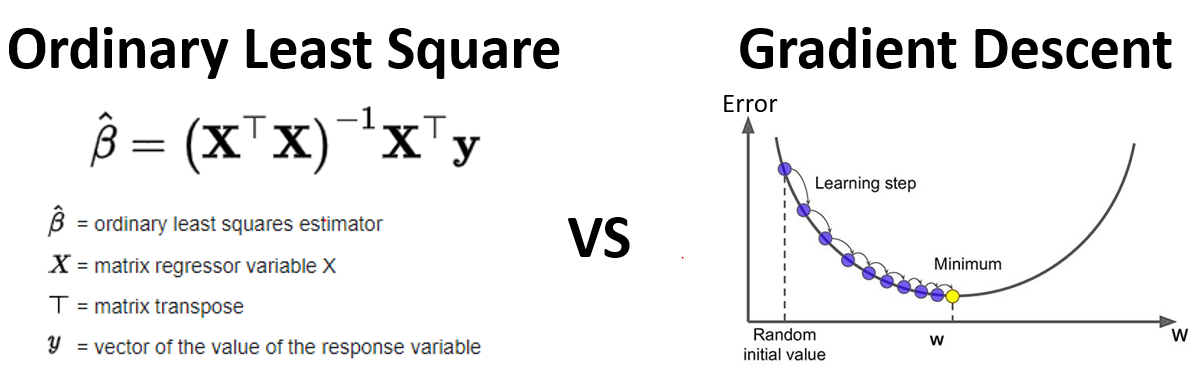

Salah satu library yang cukup lengkap untuk analisis regresi berbasis algoritma iteratif adalah PyCaret. Meskipun di library sklearn kita juga dapat melakukan analisis menggunakan algoritma iteratif, namun akan sangat memudahkan kita jika menggunanakan fitur pada PyCaret karena integrasi dan fitur yang tergolong lengkap. Selain sebagai library analisis, PyCaret juga tergolong library Auto Machine Learning (AutoML), di mana user dimudahkan untuk melakukan analisis hanya dengan beberapa line code. **Tentunya sebagai user, sebelum menggunakan fitur library AutoML harus terlebih dahulu memahami konsep dasar dan cara berfikir atas tahapan analisis agar dapat melakukan analisis dan menginterpretasikan hasil dengan benar dan tepat.** 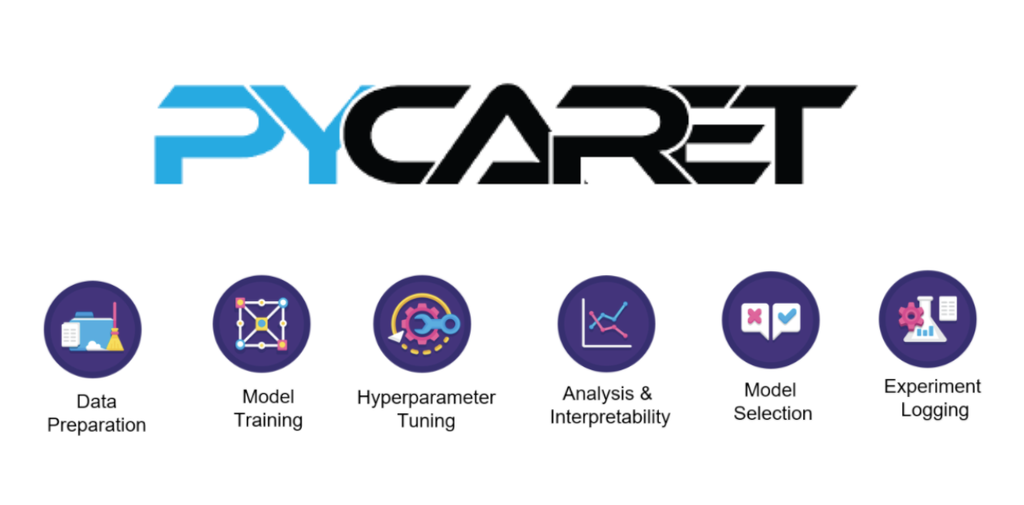

Dengan menggunakan data yang sama seperti praktek kasus Multiple Linear Regression, berikut akan dianalisis memanfaatkan library AutoML PyCaret:

#### (3.2.1) Install Library PyCaret

In [68]:
!pip install pycaret

     |████████████████████████████████| 264 kB 7.1 MB/s 
     |████████████████████████████████| 1.3 MB 39.7 MB/s 
     |████████████████████████████████| 248 kB 53.6 MB/s 
     |████████████████████████████████| 6.8 MB 47.4 MB/s 
     |████████████████████████████████| 14.4 MB 60 kB/s 
     |████████████████████████████████| 1.7 MB 16.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 80 kB 8.7 MB/s 
     |████████████████████████████████| 167 kB 39.6 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 105 kB 33.7 MB/s 
     |████████████████████████████████| 271 kB 36.0 MB/s 
     |████████████████████████████████| 2.0 MB 33.8 MB/s 
     |████████████████████████████████| 10.1 MB 28.7 MB/s 
     |████████████████████████████████| 636 kB 48.2 MB/s 
     |██████████████████

#### (3.2.2) Fungsi Library PyCaret

In [1]:
import pycaret

from pycaret.regression import *

#### (3.2.3) Model Building, Interpretation, and Evaluation

In [91]:
model = setup(data = data2, target = 'price', session_id = 1234)

,Description,Value
0,session_id,1234
1,Target,price
2,Original Data,"(21613, 22)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15129, 62)"


In [92]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,6.781465e+04,1.538794e+10,1.234264e+05,8.874000e-01,0.1732,1.298000e-01,0.397
et,Extra Trees Regressor,7.174752e+04,1.827558e+10,1.345149e+05,8.659000e-01,0.1808,1.349000e-01,10.707
rf,Random Forest Regressor,7.157364e+04,1.879410e+10,1.364497e+05,8.624000e-01,0.1800,1.332000e-01,15.456
gbr,Gradient Boosting Regressor,8.016811e+04,1.941608e+10,1.389118e+05,8.576000e-01,0.1983,1.541000e-01,3.904
llar,Lasso Least Angle Regression,1.203062e+05,3.678140e+10,1.915921e+05,7.293000e-01,0.3241,2.353000e-01,0.047
br,Bayesian Ridge,1.204206e+05,3.677540e+10,1.915765e+05,7.293000e-01,0.3242,2.357000e-01,0.118
lasso,Lasso Regression,1.203863e+05,3.678196e+10,1.915943e+05,7.292000e-01,0.3257,2.355000e-01,0.545
dt,Decision Tree Regressor,1.043083e+05,3.815205e+10,1.940984e+05,7.225000e-01,0.2568,1.900000e-01,0.282
ridge,Ridge Regression,1.349539e+05,4.448767e+10,2.088337e+05,6.693000e-01,0.3512,2.719000e-01,0.044
omp,Orthogonal Matching Pursuit,1.395344e+05,4.955312e+10,2.222554e+05,6.360000e-01,0.3565,2.697000e-01,0.037


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [93]:
model_lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,68231.1365,1.580072e+10,125700.9196,0.9035,0.1673,0.1262
1,64908.3837,1.306813e+10,114315.9154,0.8886,0.1693,0.1255
2,69816.1676,2.262333e+10,150410.5495,0.8460,0.1812,0.1354
3,75258.2147,1.803285e+10,134286.4342,0.8724,0.1843,0.1395
4,70943.7191,1.587840e+10,126009.5370,0.8748,0.1781,0.1356
5,67509.2098,1.752535e+10,132383.3636,0.8798,0.1690,0.1258
6,67519.8564,1.276875e+10,112998.8834,0.8987,0.1738,0.1323
7,63634.3146,1.151627e+10,107313.8699,0.9063,0.1639,0.1234
8,63149.3017,1.258546e+10,112184.9238,0.8906,0.1750,0.1278
9,67176.1630,1.408010e+10,118659.6002,0.9130,0.1696,0.1260


#### (3.2.4) Model Tuning (Hyperparameter)

In [94]:
tuned_lgbm = tune_model(model_lgbm, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,67842.6526,1.581948e+10,125775.5208,0.9034,0.1680,0.1243
1,66510.1297,1.324752e+10,115097.8754,0.8871,0.1710,0.1276
2,70070.7096,2.283944e+10,151127.2334,0.8445,0.1807,0.1350
3,74717.8732,1.807703e+10,134450.8499,0.8720,0.1825,0.1351
4,71714.6130,1.578379e+10,125633.5738,0.8756,0.1831,0.1370
5,69384.9245,1.681228e+10,129662.1943,0.8847,0.1729,0.1291
6,69064.6746,1.313493e+10,114607.7028,0.8958,0.1772,0.1315
7,66552.5083,1.329596e+10,115308.1262,0.8918,0.1667,0.1244
8,67993.0816,1.566994e+10,125179.6125,0.8638,0.1824,0.1314
9,66975.4982,1.310612e+10,114481.9688,0.9190,0.1699,0.1257


In [95]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### (3.2.5) Prediction

In [96]:
predict_model(tuned_lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,69014.1415,1.756648e+10,132538.5953,0.8648,0.1766,0.128


,id,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_0,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,waterfront_0,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_10,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,year_2014,price,Label
0,9.414610e+09,1.75,2030.0,10089.0,1.0,1330.0,700.0,1976.0,0.0,98027.0,47.521702,-122.050003,2030.0,9827.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,485000.0,533439.501728
1,2.513001e+08,2.25,2510.0,12013.0,2.0,2510.0,0.0,1988.0,0.0,98003.0,47.347301,-122.314003,1870.0,8017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,358000.0,285815.386360
2,7.937900e+09,2.75,3630.0,38461.0,2.0,3630.0,0.0,2000.0,0.0,98058.0,47.428902,-122.094002,4440.0,50378.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,716500.0,571595.002493
3,1.771111e+09,1.00,1660.0,11783.0,1.0,1160.0,500.0,1978.0,0.0,98077.0,47.756302,-122.074997,1320.0,10541.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,367500.0,377274.154278
4,3.905100e+09,2.50,2030.0,3974.0,2.0,2030.0,0.0,1994.0,0.0,98029.0,47.569199,-122.005997,1780.0,3953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,544000.0,555234.516711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,8.056000e+09,1.75,1890.0,9466.0,2.0,1890.0,0.0,1987.0,0.0,98004.0,47.614399,-122.210999,2180.0,12825.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1065000.0,912207.709686
6480,8.564860e+09,2.50,2680.0,5539.0,2.0,2680.0,0.0,2013.0,0.0,98045.0,47.476101,-121.734001,2990.0,6037.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,459990.0,506022.476409
6481,5.137800e+09,2.50,2718.0,6197.0,2.0,2718.0,0.0,2006.0,0.0,98092.0,47.325500,-122.164001,2667.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,388500.0,364602.487975
6482,9.557300e+09,1.75,1980.0,6760.0,1.0,1980.0,0.0,1973.0,0.0,98008.0,47.639801,-122.112999,2120.0,7280.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,530000.0,533298.584412


#### (3.2.6) Finalizing and Saving Model

In [97]:
final_lgbm = finalize_model(tuned_lgbm)
print(tuned_lgbm)

LGBMRegressor(bagging_fraction=0.7, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=21, min_child_weight=0.001, min_split_gain=0.8,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=1234, reg_alpha=2, reg_lambda=5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [98]:
save_model(final_lgbm,'Final LGBM Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.2,
                                max_depth=-1, min_child_samples=21,
                    

## Daftar Pustaka

https://seaborn.pydata.org/

https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://www.thedataincubator.com/blog/2017/11/08/scikit-learn-vs-statsmodels/

https://heartbeat.fritz.ai/feature-ranking-with-recursive-feature-elimination-3e22db639208

https://www.pycaret.org/tutorials/html/REG101.html